In [139]:
# Packages Import
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import scipy.stats as stat
import seaborn as sns
import pandas as pd
import numpy as np
import pylab
%matplotlib inline

## Reading the Data

In [140]:
# Reading the dataset
df = pd.read_csv('drug.csv')

In [141]:
# Checking unique categories for Encoding
df['Sex'].unique(), df['BP'].unique(), df['Cholesterol'].unique(), df['Drug'].unique()

(array(['F', 'M'], dtype=object),
 array(['HIGH', 'LOW', 'NORMAL'], dtype=object),
 array(['HIGH', 'NORMAL'], dtype=object),
 array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object))

In [142]:
# Encoding
def convert_gender(x):
    binary_dict = {'M':1,"F":0}
    return binary_dict[x]
def convert_bp(x):
    binary_dict = {'HIGH':2,"NORMAL":1,"LOW":0}
    return binary_dict[x]
def convert_cholesterol(x):
    binary_dict = {'HIGH':2,"NORMAL":1,"LOW":0}
    return binary_dict[x]
def convert_drug(x):
    binary_dict = {'drugY':1,"drugC":2,"drugX":3,"drugA":4,"drugB":5}
    return binary_dict[x]

In [143]:
# Encoding transformation
df['Sex'] = df['Sex'].apply(lambda x: convert_gender(x))
df['BP'] = df['BP'].apply(lambda x: convert_bp(x))
df['Cholesterol'] = df['Cholesterol'].apply(lambda x: convert_cholesterol(x))

In [144]:
# Encoding transformation for target variable
df['Drug'] = df['Drug'].apply(lambda x: convert_drug(x))

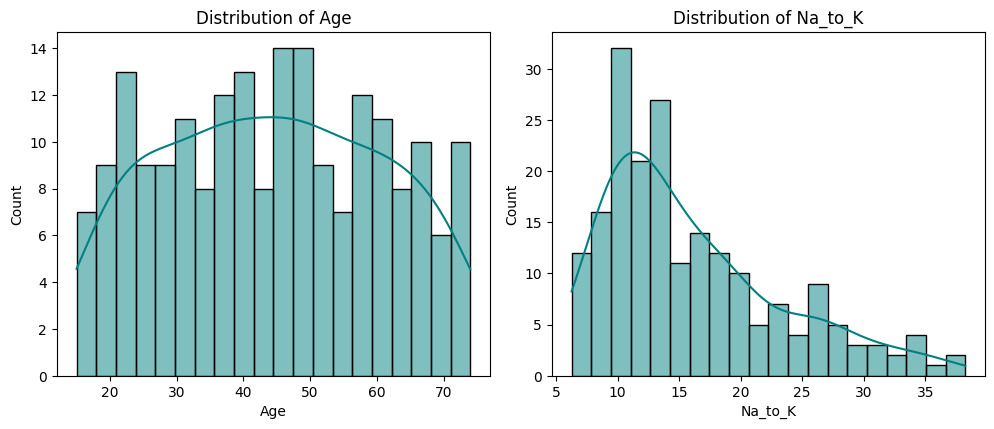

In [146]:
# Displaying the distribution
num_cols = ['Age', 'Na_to_K']

# Set up figure size
plt.figure(figsize=(15, 12))

# Plot histograms
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], bins=20, kde=True, color='teal')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

##### From the above figure we can understand that the Na_to_K is right skewed. So first we will be try to use StandardScaler to normalize the data

In [148]:
scaler = StandardScaler()
df[['Age_scaler']]= scaler.fit_transform(df[['Age']])
df[['Na_to_K_scaler']] = scaler.fit_transform(df[['Na_to_K']])

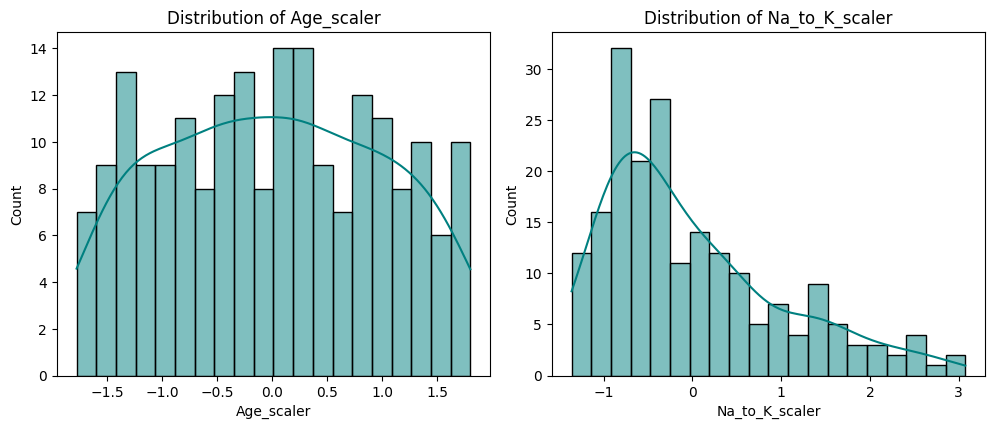

In [149]:
# Displaying the distribution
num_cols = ['Age_scaler', 'Na_to_K_scaler']

# Set up figure size
plt.figure(figsize=(15, 12))

# Plot histograms
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], bins=20, kde=True, color='teal')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

##### Even after the StandardScaler is fitted, the data is skewed. So now, we will try to use Gaussian transformation to normalize the data

In [150]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist = 'norm',plot = pylab)
    plt.show()

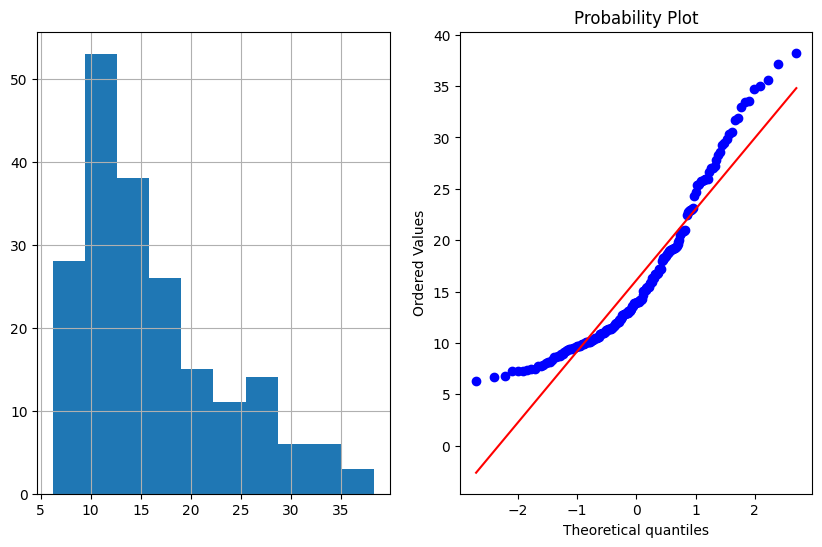

In [151]:
plot_data(df,'Na_to_K')

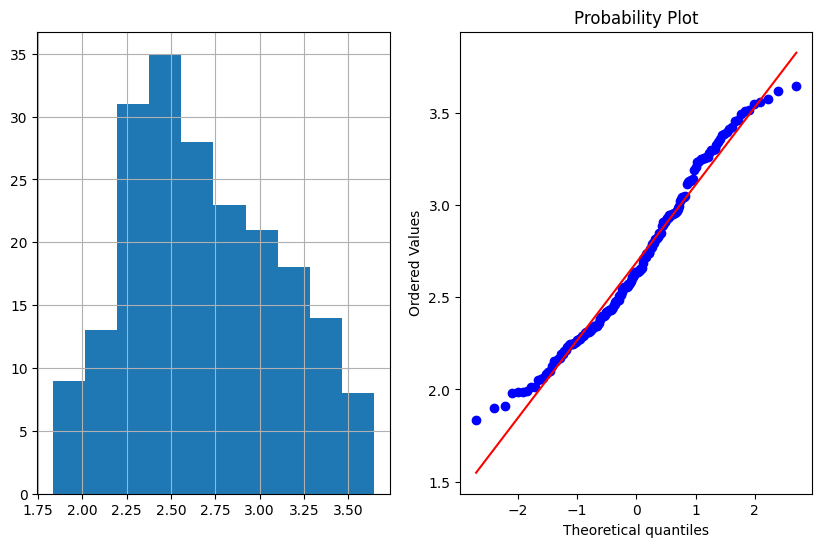

In [152]:
df['Na_to_K_Log'] = np.log(df['Na_to_K'])
plot_data(df,'Na_to_K_Log')

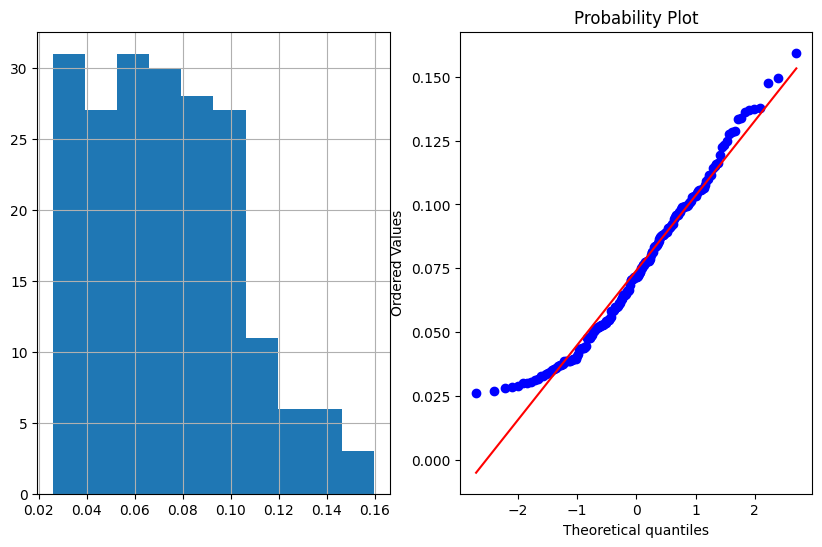

In [153]:
df['Na_to_K_Reciporcal'] = 1/df['Na_to_K']
plot_data(df,'Na_to_K_Reciporcal')

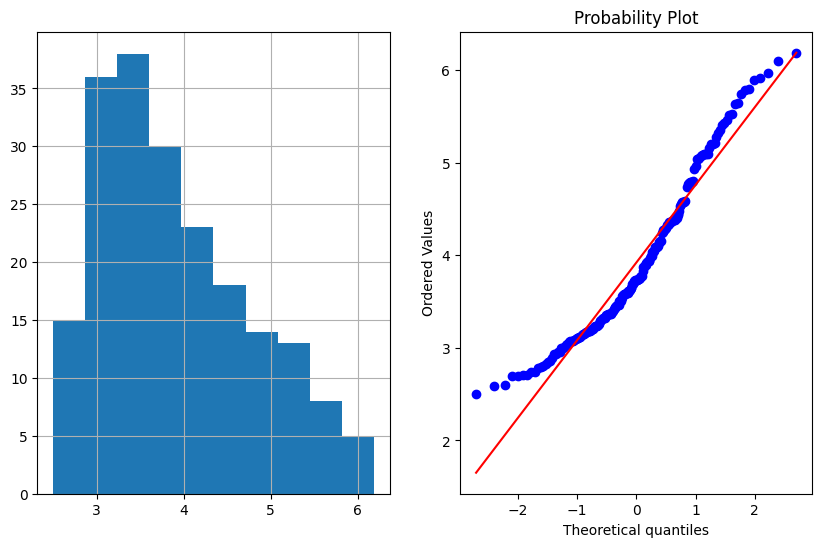

In [154]:
df['Na_to_K_Sqrt'] = df['Na_to_K']**(1/2)
plot_data(df,'Na_to_K_Sqrt')

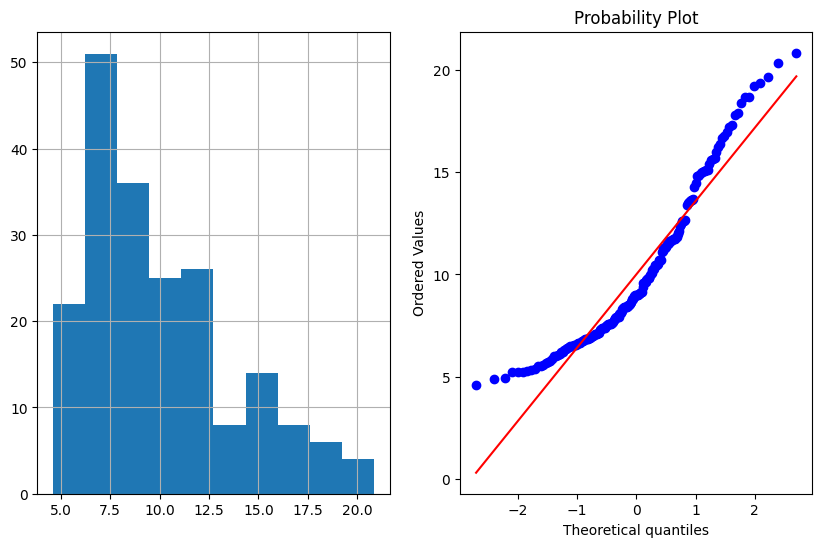

In [155]:
df['Na_to_K_Exp'] = df['Na_to_K']**(1/1.2)
plot_data(df,'Na_to_K_Exp')

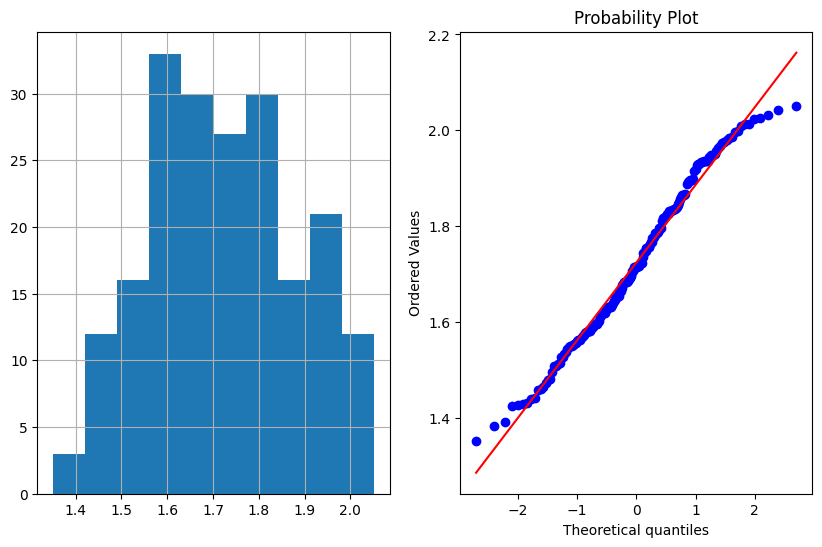

In [156]:
df['Na_to_K_Boxcox'],parameters = stat.boxcox(df['Na_to_K'])
plot_data(df,'Na_to_K_Boxcox')

##### From the above Q-Q plots and distribution graph, we can understand that the Box-cox transformation significantly normalizes the data better  

In [157]:
df['Na_to_K'] = df['Na_to_K_Boxcox']

In [158]:
# Dropping the unnecessary columns
df.drop(columns=['Na_to_K_Log','Na_to_K_Reciporcal','Na_to_K_Sqrt','Na_to_K_Exp','Na_to_K_Boxcox','Age_scaler','Na_to_K_scaler'], inplace=True)

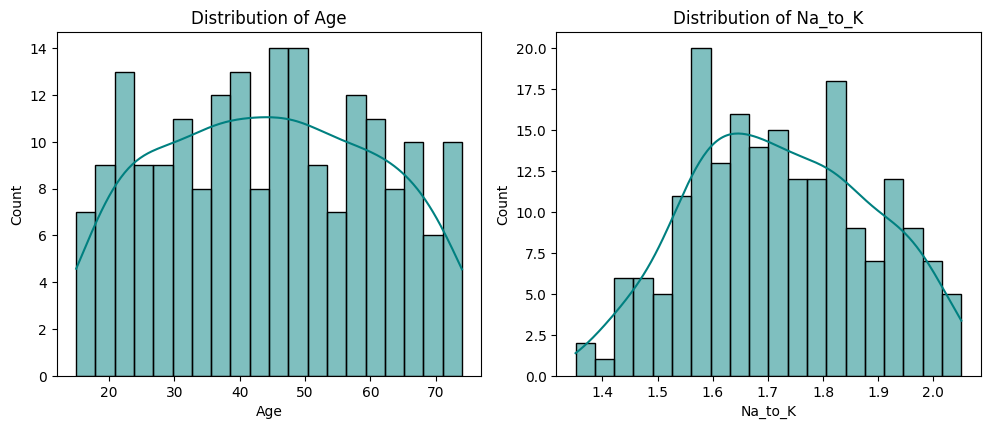

In [159]:
num_cols = ['Age', 'Na_to_K']

# Set up figure size
plt.figure(figsize=(15, 12))

# Plot histograms
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], bins=20, kde=True, color='teal')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [160]:
X,y = df.drop(columns='Drug'),df['Drug']

In [161]:
# Shape
X.shape, y.shape

((200, 5), (200,))

In [163]:
# Model Building
from sklearn.cluster import KMeans

In [164]:
# Finding the cluster k using elbow method
wcss = []
for k in range(1,11):
    model=KMeans(n_clusters=k,init="k-means++")
    model.fit(X)
    wcss.append(model.inertia_)

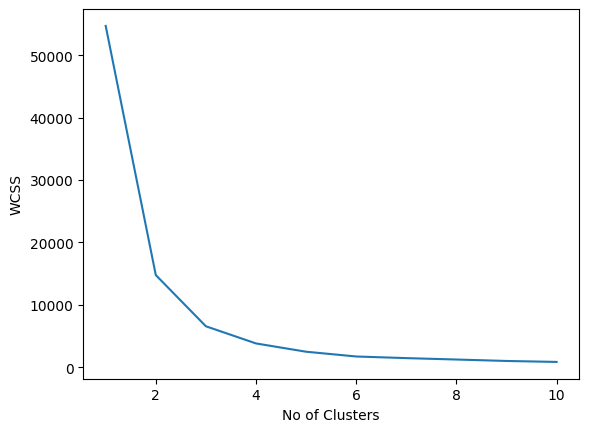

In [165]:
# Plotting Graph
plt.plot(range(1,11),wcss)
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

In [171]:
# Model Building
kmeans = KMeans(n_clusters=3,init="k-means++")
y_pred = kmeans.fit_predict(X)

In [172]:
# Kneelocator
from kneed import KneeLocator
kn = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kn.elbow

np.int64(3)

In [173]:
# Silhouette Scoring
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X)
    score = silhouette_score(X,kmeans.labels_)
    silhouette_scores.append(score)

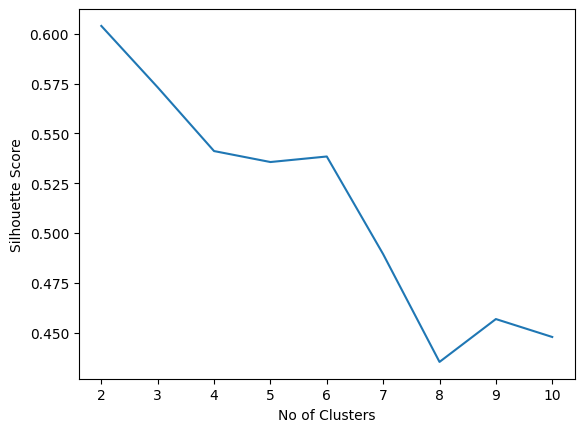

In [174]:
# Plotting Graph
plt.plot(range(2,11),silhouette_scores)
plt.xlabel('No of Clusters')
plt.ylabel("Silhouette Score")
plt.xticks(range(2,11))
plt.show()